<a href="https://colab.research.google.com/github/Fares00T/AI-Algorithms/blob/main/Ant_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ant algorithm


Best Cost: 43.629476033689144
Best Tour: [7 4 8 9 1 5 0 3 2 6 7]


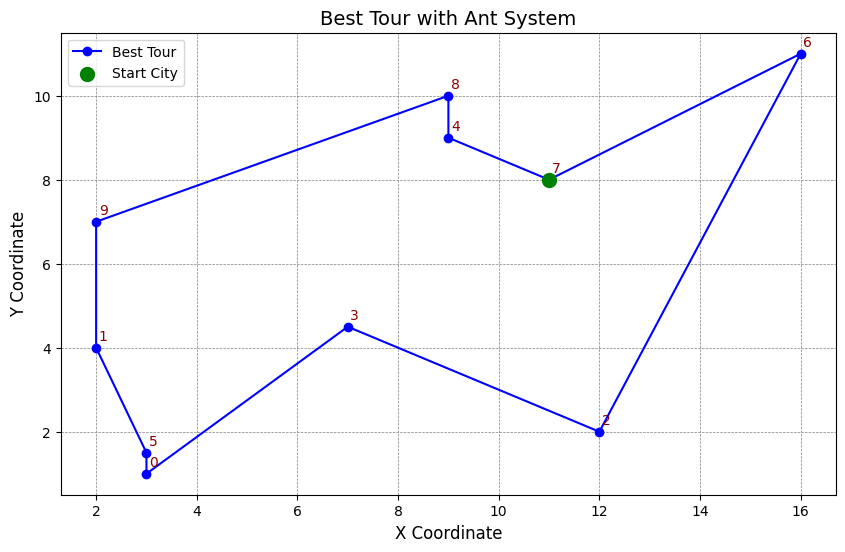

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def traveling_salesman(ants, alpha, beta, N_max, ro):
    # Define cities and coordinates (single set of cities as given by the mentor)
    cities = 10
    x = np.array([0, 3, 6, 7, 15, 12, 14, 9, 7, 0])
    y = np.array([1, 4, 5, 3, 0, 4, 10, 6, 9, 10])

      # Cities 4
    x = np.array([3, 2, 12, 7, 9, 3, 16, 11, 9, 2])
    y = np.array([1, 4, 2, 4.5, 9, 1.5, 11, 8, 10, 7])


    # Calculate distances and initial pheromone levels
    L = np.zeros((cities, cities))
    dtau = np.zeros((cities, cities))
    for i in range(cities):
        for j in range(cities):
            L[i, j] = np.sqrt((x[i] - x[j])**2 + (y[i] - y[j])**2)
            dtau[i, j] = 1 / L[i, j] if L[i, j] != 0 else 0

    tau = (1 / np.max(L)) * np.ones((cities, cities))

    # Assign ants to random starting cities
    initial_positions = np.random.randint(0, cities, ants)

    lowest_cost = float('inf')
    best_tour = None

    # Main loop for iterations
    for _ in range(N_max):
        #Stores the paths chosen by each ant
        tours = np.zeros((ants, cities + 1), dtype=int)
        tours[:, 0] = initial_positions

        costs = np.zeros(ants)

        for ant in range(ants):
            dtau_temp = np.copy(dtau)

            for step in range(1, cities):
                current = tours[ant, step - 1]
                dtau_temp[:, current] = 0  # Mark visited cities

                P = (tau[current, :]**alpha) * (dtau_temp[current, :]**beta)
                P = P / np.sum(P) # Probability of moving to each city

                next_city = np.random.choice(np.arange(cities), p=P)
                tours[ant, step] = next_city

            # Complete the tour
            tours[ant, -1] = tours[ant, 0]

            # Calculate cost
            cost = sum(L[tours[ant, i], tours[ant, i + 1]] for i in range(cities))
            costs[ant] = cost

            # Update pheromone
            for i in range(cities):
                tau[tours[ant, i], tours[ant, i + 1]] = (
                    (1 - ro) * tau[tours[ant, i], tours[ant, i + 1]] + 1 / cost
                )

        # Update the best solution Old pheromones are reduced by (1 - ro) (evaporation).
        min_cost = np.min(costs)
        if min_cost < lowest_cost:
            lowest_cost = min_cost
            best_tour = tours[np.argmin(costs)]

    print(f"Best Cost: {lowest_cost}")
    print(f"Best Tour: {best_tour}")

    # Ploting
    plt.figure(figsize=(10, 6))
    best_x = [x[node] for node in best_tour]
    best_y = [y[node] for node in best_tour]
    plt.plot(best_x, best_y, '-o', label='Best Tour', color='blue')

    for i in range(cities):
        plt.annotate(f'{i}', (x[i], y[i]), textcoords="offset points", xytext=(5, 5), ha='center', fontsize=10, color='darkred')

    plt.scatter(x[best_tour[0]], y[best_tour[0]], color='green', s=100, label='Start City', zorder=5)

    plt.grid(color='gray', linestyle='--', linewidth=0.5)
    plt.title('Best Tour with Ant System', fontsize=14)
    plt.xlabel('X Coordinate', fontsize=12)
    plt.ylabel('Y Coordinate', fontsize=12)
    plt.legend()
    plt.show()

    return {
        "best_cost": lowest_cost,
        "best_tour": best_tour
    }

# Example usage
solution = traveling_salesman(ants=10, alpha=1, beta=2, N_max=100, ro=0.1)
